<font color = green >

## Home Task
</font>

<font color = green>

### Brest Cancer Dataset

</font>



In [319]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import h5py

path = '../data/nn'

In [320]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [321]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100, 100),
    random_state = 0,
    max_iter= 10000
).fit(X_train,y_train)

print('Layers: (100, 100), alpha= 0.0001')
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)), end='\n\n')

clf = MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100),
    random_state = 0,
    alpha= 5,
    max_iter= 10000
).fit(X_train_scaled,y_train)

print('Layers: (100), alpha= 5')
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))
# END_CODE 

Layers: (100, 100), alpha= 0.0001
train accuracy= 96.948%
test accuracy= 95.105%

Layers: (100), alpha= 5
train accuracy= 98.826%
test accuracy= 97.902%


<font color = green>

##  Signs dataset

</font>



In [322]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes


In [323]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [324]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)


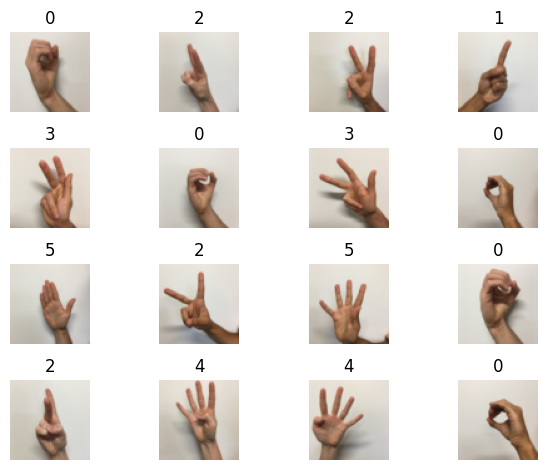

In [325]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [326]:
# Not in use 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [327]:
# YOUR_CODE.  Preproces data
# START_CODE
n_pix = X_train.shape[1]
m_train = X_train.shape[0]
m_test = X_test.shape[0]
X_train_scaled = X_train.reshape(m_train, -1) / 255
X_test_scaled = X_test.reshape(m_test, -1) / 255

# proved to make it worse
# y_train_onehot = convert_to_one_hot(y_train, len(classes))
# y_test_onehot = convert_to_one_hot(y_test, len(classes))
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[0]))
print ("number of test examples = " + str(X_test_scaled.shape[0]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))
print ("X_test_scaled shape: " + str(X_test_scaled.shape))
print ("y_train shape: " + str(y_train.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
y_train shape: (1080,)
y_test shape: (120,)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

In [328]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets
# START_CODE 
clf = MLPClassifier(
    solver='lbfgs',
    hidden_layer_sizes=(100),
    alpha=10,
    max_iter=10000,
    random_state=42
).fit(X_train_scaled, y_train)

print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))
# END_CODE     

train accuracy= 100.000%
test accuracy= 94.167%


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

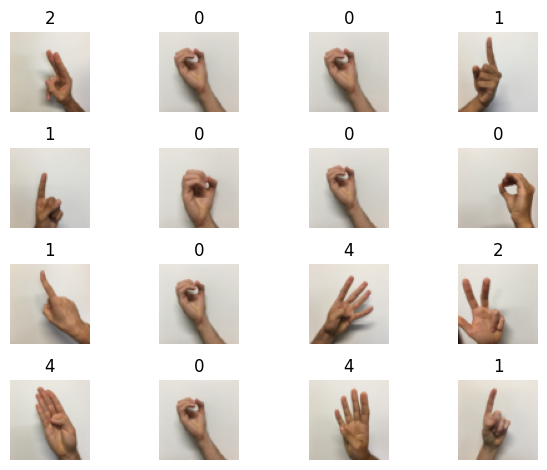

In [329]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)


### Compare with SVM 

In [330]:
from sklearn.svm import SVC

In [331]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%
